# Aufgabe 2: Multi-Class Perceptrons

In [358]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [359]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

In [360]:
y

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [361]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

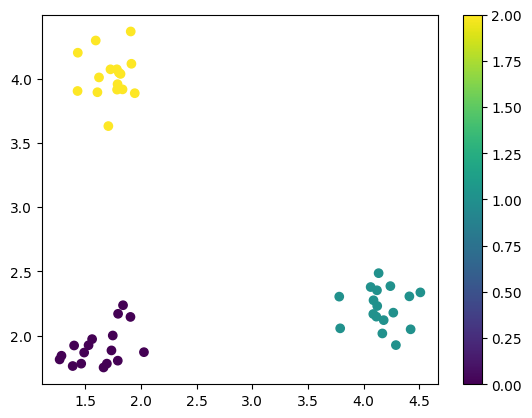

In [362]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

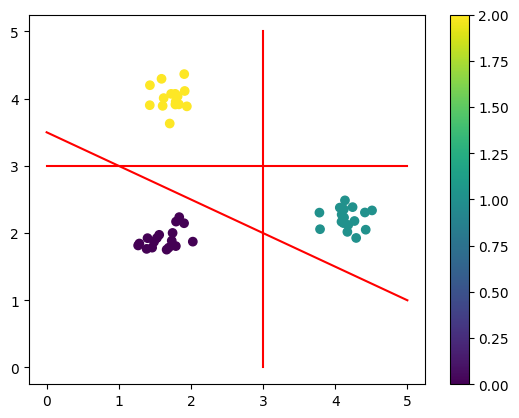

In [363]:
plt.scatter(X[:,0],X[:,1],c=y)


line1x= np.arange(0,6)
line1y= lambda x: (x * -0.5) +3.5

line2x = np.arange(0,6)
line2y = lambda x: (x * (0)) + 3

plt.plot(line1x,line1y(line1x), 'r-')
plt.plot(line2x,line2y(line1x), 'r-')
plt.plot(line2y(line1x),line2x, 'r-')
plt.plot()
plt.colorbar()

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [364]:
from sklearn.preprocessing import OneHotEncoder

In [365]:
onehot = OneHotEncoder()
y_one = onehot.fit_transform(y.reshape(1,-1))
y_one

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50 stored elements and shape (1, 50)>

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

In [366]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

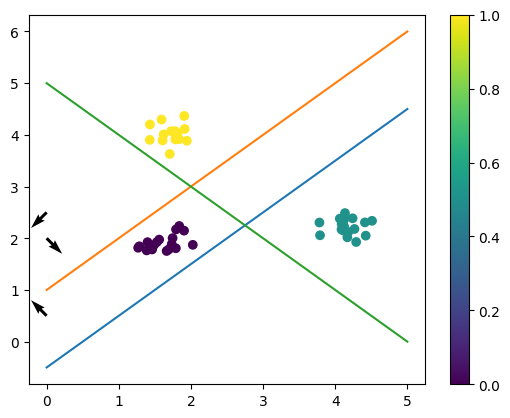

In [367]:
fig, ax1 = plt.subplots()

w1 = np.array([-1,1])
b1 = (0.5)

w2 = np.array([2,-2])
b2 = (2)

w3 = np.array([-0.5,-0.5])
b3 = (2.5)

line1 = plot_line_from_normal_vector_and_offset(w1,b1,x_range= [0,5], ax= ax1)
line2 = plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5], ax= ax1)
line3 = plot_line_from_normal_vector_and_offset(w3,b3,x_range= [0,5], ax= ax1)

plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b1,w1[0],w1[1])
plt.quiver(0,b2,w2[0],w2[1])
plt.quiver(0,b3,w3[0],w3[1])
plt.colorbar()

#### test single perceptrons by class


In [368]:
#use first train sample
w1.dot(X[1,:].T)+b1

np.float64(-1.1846419043855065)

In [369]:
#or
X[1,:].dot(w1)+b1

np.float64(-1.1846419043855065)

In [370]:
# check for all train samples if sign(y)==sign(wx+b)
i=1
print (y[i],np.sign(w1.dot(X[i,:].T)+b1))
y[i]==np.sign(w1.dot(X[i,:].T)+b1)

1 -1.0


np.False_

In [371]:
w1.dot(X.T)+b1

array([ 0.91375433, -1.1846419 ,  2.42406508, -1.23177875,  2.84603857,
        2.88633522, -1.60501755,  0.89938442,  2.78538731,  2.62901568,
        0.82091355,  2.5819932 ,  0.74165768, -1.58724821, -1.31323034,
        0.65200105,  1.04755865, -1.39091767, -1.14835612,  0.59054972,
        2.78888872, -1.35457622,  3.20286748, -0.97692852, -1.55905384,
       -1.86285065,  0.75623106, -1.46591276,  2.70114448, -1.41806155,
        2.97348539,  0.51552863,  0.87895395, -1.6729087 ,  3.268893  ,
        2.74416212,  2.72007227,  0.34635538,  2.44222406,  0.87713622,
        0.88068093,  2.66702186,  1.0598228 ,  2.95844539, -1.87248163,
        0.89823458,  0.59025323, -1.65052754,  1.02592338, -1.26651771])

In [372]:
np.sign(w1.dot(X.T)+b1)

array([ 1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.])

In [373]:
#check result
y==np.sign(w1.dot(X.T)+b1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [374]:
y==np.sign(X.dot(w1.T)+b1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [375]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w1.dot(X.T)+b1))
print(pos)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)


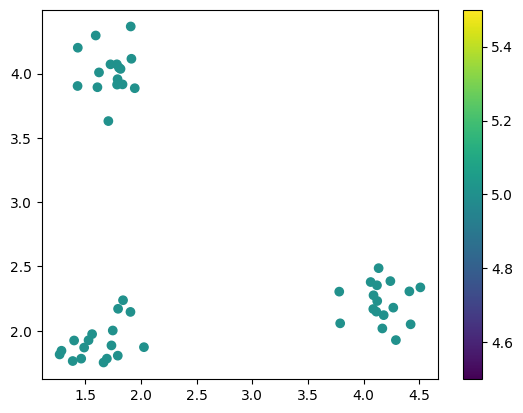

In [376]:
y_test=np.copy(y)
y_test[pos]=5
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

(array([ 0,  2,  4,  5,  7,  8,  9, 10, 11, 12, 15, 16, 19, 20, 22, 26, 28,
       30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48]),)


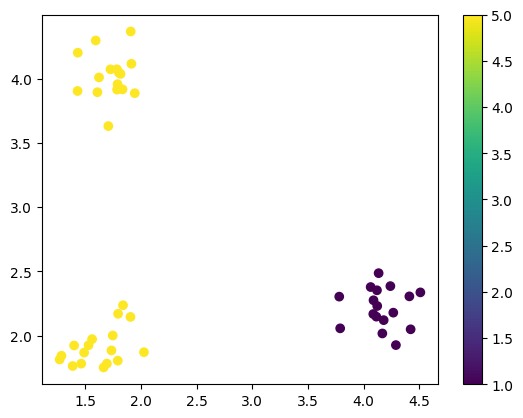

In [379]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w2.dot(X.T)+b2))
print(pos)
y_test=np.copy(y)
y_test[pos]= 5
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)


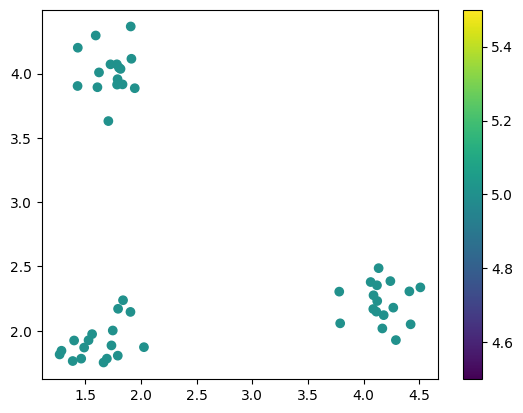

In [377]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w3.dot(X.T)+b3))
print(pos)
y_test=np.copy(y)
y_test[pos]= 5
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

#### test full Setup

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [378]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""

    return